In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np

In [7]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img=tf.keras.utils.load_img(r"C:/Users/user/Desktop/cnn/train/cedrick/IMG_0625.JPG")
X=tf.keras.utils.img_to_array(img)
X=X.reshape((1,) + X.shape)


i=0
for batch in datagen.flow(X, batch_size=1,
                          save_to_dir=r'C:\Users\user\Desktop\cnn\preview', save_prefix='ced', save_format='jpeg'):
    i += 1
    if i > 20:
        break

In [9]:
training_set=datagen.flow_from_directory(r'C:\Users\user\Desktop\cnn\preview',target_size=(64,64),batch_size=32,class_mode='binary',)

Found 0 images belonging to 0 classes.


In [10]:
import cv2

In [11]:
from keras.preprocessing import image

In [14]:
img=image.load_img(r"C:/Users/user/Desktop/cnn/train/cedrick/IMG_0625.JPG")

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

In [15]:
from PLT import image

ModuleNotFoundError: No module named 'PLT'

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
b=np.array([a**2])

In [24]:
data={'number':[2,3,5,10,7],'num':[4,9,25,100,47]}


In [25]:
df=pd.DataFrame(data)

In [26]:
df

,number,num
0,2,4
1,3,9
2,5,25
3,10,100
4,7,47


<AxesSubplot:xlabel='number', ylabel='num'>

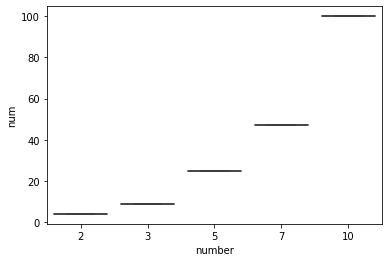

In [27]:
sns.boxplot(x="number",y="num",data=df)

In [ ]:
# pip install -U spacy
# pip install -U spacy-lookups-data
# python -m spacy download en_core_web_sm
# python -m spacy download en_core_web_md
# python -m spacy download en_core_web_lg

## In this article, we are going to perform the below tasks.
## General Feature Extraction
File loading \n
Word counts
Characters count
Average characters per word
Stop words count
Count #HashTags and @Mentions
If numeric digits are present in twitts
Upper case word counts

In [ ]:
Preprocessing and Cleaning
Lower case
Contraction to Expansion
Emails removal and counts
URLs removal and counts
Removal of RT
Removal of Special Characters
Removal of multiple spaces
Removal of HTML tags
Removal of accented characters
Removal of Stop Words
Conversion into base form of words
Common Occuring words Removal
Rare Occuring words Removal
Word Cloud
Spelling Correction
Tokenization
Lemmatization
Detecting Entities using NER
Noun Detection
Language Detection
Sentence Translation
Using Inbuilt Sentiment Classifier
Advanced Text Processing and Feature Extraction
N-Gram, Bi-Gram etc
Bag of Words (BoW)
Term Frequency Calculation TF
Inverse Document Frequency IDF
TFIDF Term Frequency - Inverse Document Frequency
Word Embedding Word2Vec using SpaCy

## Machine Learning Models for Text Classification
SGDClassifier
LogisticRegression
LogisticRegressionCV
LinearSVC
RandomForestClassifier

In [ ]:
import pandas as pd
import numpy as np

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
df = pd.read_csv('twitter16m.csv', encoding = 'latin1', header = None)

In [ ]:
df.head()

In [ ]:
df = df[[5, 0]]

In [ ]:
df['sentiment'].value_counts()

In [ ]:
sent_map = {0: 'negative', 4: 'positive'}

In [ ]:
df['word_counts'] = df['twitts'].apply(lambda x: len(str(x).split()))

In [ ]:
df.head()

In [ ]:
df['char_counts'] = df['twitts'].apply(lambda x: len(x))

In [ ]:
df.head()

Average Word Length
In this step, we have created a function get_avg_word_len() in which we are calculating the average word length inside each sentences

In [ ]:

def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words) # != len(x)/len(words)

In [ ]:
df['avg_word_len'] = df['twitts'].apply(lambda x: get_avg_word_len(x))

In [ ]:
len('this is nlp lesson')/4

In [ ]:
df.head()

## Stop Words Count

In [ ]:
print(STOP_WORDS)

In [ ]:
x = 'this is text data'

In [ ]:
x.split()

In [ ]:
len([t for t in x.split() if t in STOP_WORDS])

In [ ]:
df['stop_words_len'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [ ]:
df.head()

##  Count #HashTags and @Mentions

In [ ]:
x = 'this #hashtag and this is @mention'
# x = x.split()
# x

In [ ]:
df['hashtags_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df['mentions_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))

In [ ]:
df.head()

## If numeric digits are present in twitts

In [ ]:
df['numerics_count'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))

In [ ]:
df.head()

## UPPER case words count

In [ ]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper() and len(x)>3]))

In [ ]:
df.head()

In [ ]:
df.loc[96]['twitts']

##  Preprocessing and Cleaning

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: x.lower())

In [ ]:
df.head(2)

## Contraction to Expansion

In [ ]:
x = "i don't know what you want, can't, he'll, i'd"

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
x = "hi, i'd be happy"

In [ ]:
cont_to_exp(x)

In [ ]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: cont_to_exp(x))

## Count and Remove Emails

In [ ]:
import re

In [ ]:
x = 'hi my email me at email@email.com another@email.com'

In [ ]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x)

In [ ]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', x))

In [ ]:
df['emails_count'] = df['emails'].apply(lambda x: len(x))

In [ ]:
df[df['emails_count']>0].head()

In [ ]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x)

In [ ]:
'hi my email me at  '

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', x))

## Count URLs and Remove it

In [ ]:
x = 'hi, to watch more visit https://youtube.com/kgptalkie'

In [ ]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

In [ ]:
[('https', 'youtube.com', '/kgptalkie')]

In [ ]:
df['urls_flag'] = df['twitts'].apply(lambda x: len(re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)))

In [ ]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', x)

## Remove RT

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('RT', "", x))

## Special Chars removal or punctuation remova

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+', '', x))

In [ ]:
df.head()

##  Remove multiple spaces "hi hello "

In [ ]:
x = 'thanks    for    watching and    please    like this video'

In [ ]:
" ".join(x.split())

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join(x.split()))

## Remove HTML tags

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
x = '<html><h2>Thanks for watching</h2></html>'

In [ ]:
BeautifulSoup(x, 'lxml').get_text()

In [ ]:
%%time
df['twitts'] = df['twitts'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())

## Remove Accented Chars

In [ ]:
import unicodedata

In [ ]:
x = 'Áccěntěd těxt'

In [ ]:
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [ ]:
remove_accented_chars(x)

## SpaCy and NLP
## Remove Stop Word

In [ ]:
import spacy

In [ ]:
x = 'this is stop words removal code is a the an how what'

In [ ]:
" ".join([t for t in x.split() if t not in STOP_WORDS])

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

## Convert into base or root form of word

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
x = 'kenichan dived times ball managed save 50 rest'

In [ ]:
def make_to_base(x):
    x_list = []
    doc = nlp(x)
    
    for token in doc:
        lemma = str(token.lemma_)
        if lemma == '-PRON-' or lemma == 'be':
            lemma = token.text
        x_list.append(lemma)
    print(" ".join(x_list))

In [ ]:
make_to_base(x)

##  Common words removal

In [ ]:
' '.join(df.head()['twitts'])

In [ ]:
text = text.split()

In [ ]:
freq_comm = pd.Series(text).value_counts()

In [ ]:
f20 = freq_comm[:20]

In [ ]:
f['twitts'] = df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

## Rare words removal

In [ ]:
rare20 = freq_comm[-20:]

In [ ]:
rare = freq_comm[freq_comm.values == 1]

In [ ]:
df['twitts'] = df['twitts'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare20]))

## Word Cloud Visualization

In [ ]:
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = ' '.join(text[:20000])

In [ ]:
len(text)

In [ ]:
wc = WordCloud(width = 800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

## Spelling Correction

In [ ]:
# !pip install -U textblob
# !python -m textblob.download_corpora

In [ ]:
from textblob import TextBlob

In [ ]:
x = 'tanks forr waching this vidio carri'

In [ ]:
x = TextBlob(x).correct()

In [ ]:
TextBlob("tanks for watching this video carry")

## Tokenization

In [ ]:
x = 'thanks#watching this video. please like it'

In [ ]:
TextBlob(x).words

In [ ]:
WordList(['thanks', 'watching', 'this', 'video', 'please', 'like', 'it'])

In [ ]:
doc = nlp(x)
for token in doc:
    print(token)

## Lemmatization

In [ ]:
x = 'runs run running ran'

In [ ]:
from textblob import Word

In [ ]:
for token in x.split():
    print(Word(token).lemmatize())

In [ ]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

## Detect Entities using NER of SpaCy

In [ ]:
x = "Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon"

In [ ]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [ ]:
from spacy import displacy

In [ ]:
displacy.render(doc, style = 'ent')

## dectecting nouns

In [ ]:
for noun in doc.noun_chunks:
    print(noun)

## Translation and Language Detection

In [ ]:
x='Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [ ]:
tb = TextBlob(x)

In [ ]:
tb.detect_language()

## Advanced Text Processing

In [ ]:
x = 'thanks for watching'

In [ ]:
tb = TextBlob(x)

In [ ]:
tb.ngrams(3)

In [ ]:
[WordList(['thanks', 'for', 'watching'])]

## Bag of Words BoW

In [ ]:
x = ['this is first sentence this is', 'this is second', 'this is last']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)

In [ ]:
text_counts.toarray()

In [ ]:
cv.get_feature_names()

In [ ]:
bow = pd.DataFrame(text_counts.toarray(), columns = cv.get_feature_names())

## Term Frequency

In [ ]:
x=['this is first sentence this is', 'this is second', 'this is last']

In [ ]:
tf = bow.copy()

In [ ]:
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

## Inverse Document Frequency IDF

In [ ]:
import numpy as np

In [ ]:
x_df = pd.DataFrame(x, columns=['words'])

In [ ]:
x_df

In [ ]:
bb = bow.astype('bool')
bb

In [ ]:
bb['is'].sum()

In [ ]:
cols = bb.columns
cols

In [ ]:
nz = []
for col in cols:
    nz.append(bb[col].sum())

In [ ]:
idf = []
for index, col in enumerate(cols):
    idf.append(np.log((N + 1)/(nz[index] + 1)) + 1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [ ]:
x_tfidf.toarray()

In [ ]:
tfidf.idf_

## Word Embeddings

In [ ]:
# !python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg')
doc = nlp('thank you! dog cat lion dfasaa')

In [ ]:
for token in doc:
    print(token.text, token.has_vector)

In [ ]:
token.vector.shape

In [ ]:
nlp('cat').vector.shape

In [ ]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

In [ ]:
#sampling the number of rows

df0 = df[df['sentiment']==0].sample(2000)
df4 = df[df['sentiment']==4].sample(2000)

In [ ]:
dfr = df0.append(df4)

In [ ]:
#removing the twitts,sentiment and emails columns

dfr_feat = dfr.drop(labels=['twitts','sentiment','emails'], axis = 1).reset_index(drop=True)

In [ ]:
y = dfr['sentiment']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
text_counts.toarray().shape

In [ ]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

In [ ]:
dfr_bow.head(2)

## ML Algorithms
## Importing Libraries for ML algorithms

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sgd = SGDClassifier(n_jobs=-1, random_state=42, max_iter=200)
lgr = LogisticRegression(random_state=42, max_iter=200)
lgrcv = LogisticRegressionCV(cv = 2, random_state=42, max_iter=1000)
svm = LinearSVC(random_state=42, max_iter=200)
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=200)

In [ ]:
clf = {'SGD': sgd, 'LGR': lgr, 'LGR-CV': lgrcv, 'SVM': svm, 'RFC': rfc}

In [ ]:
clf.keys()

In [ ]:
#here, we are training our model by defining the function classify.

def classify(X, y):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    for key in clf.keys():
        clf[key].fit(X_train, y_train)
        y_pred = clf[key].predict(X_test)
        ac = accuracy_score(y_test, y_pred)
        print(key, " ---> ", ac)

In [ ]:
%%time
classify(dfr_bow, y)